<a href="https://colab.research.google.com/github/Sinchiguano/chicagoUniversity/blob/main/week_3_2_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler



url='https://raw.githubusercontent.com/Sinchiguano/chicagoUniversity/main/prostate.csv'
df = pd.read_csv(url, sep='\t')
print(df.head(6))
print(df.shape)
print('')
df = df.drop(columns=['Unnamed: 0'])

df.head(5)
print(df.shape)

mask1=df['train']=='T'
mask2=df['train']=='F'
df_train = df[mask1]
df_test = df[mask2]

df_train.corr()

   Unnamed: 0    lcavol   lweight  age      lbph  svi       lcp  gleason  \
0           1 -0.579818  2.769459   50 -1.386294    0 -1.386294        6   
1           2 -0.994252  3.319626   58 -1.386294    0 -1.386294        6   
2           3 -0.510826  2.691243   74 -1.386294    0 -1.386294        7   
3           4 -1.203973  3.282789   58 -1.386294    0 -1.386294        6   
4           5  0.751416  3.432373   62 -1.386294    0 -1.386294        6   
5           6 -1.049822  3.228826   50 -1.386294    0 -1.386294        6   

   pgg45      lpsa train  
0      0 -0.430783     T  
1      0 -0.162519     T  
2     20 -0.162519     T  
3      0 -0.162519     T  
4      0  0.371564     T  
5      0  0.765468     T  
(97, 11)

(97, 10)


,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
lcavol,1.000000,0.300232,0.286324,0.063168,0.592949,0.692043,0.426414,0.483161,0.733155
lweight,0.300232,1.000000,0.316723,0.437042,0.181054,0.156829,0.023558,0.074166,0.485215
age,0.286324,0.316723,1.000000,0.287346,0.128902,0.172951,0.365915,0.275806,0.227642
lbph,0.063168,0.437042,0.287346,1.000000,-0.139147,-0.088535,0.032992,-0.030404,0.262938
svi,0.592949,0.181054,0.128902,-0.139147,1.000000,0.671240,0.306875,0.481358,0.556886
lcp,0.692043,0.156829,0.172951,-0.088535,0.671240,1.000000,0.476437,0.662533,0.489203
gleason,0.426414,0.023558,0.365915,0.032992,0.306875,0.476437,1.000000,0.757056,0.342428
pgg45,0.483161,0.074166,0.275806,-0.030404,0.481358,0.662533,0.757056,1.000000,0.448048
lpsa,0.733155,0.485215,0.227642,0.262938,0.556886,0.489203,0.342428,0.448048,1.000000


In [ ]:
print(df.describe())
print()
print(df.describe().loc[['mean','std']])
print(df.dtypes)
print(df.head(6))

          lcavol    lweight        age       lbph        svi        lcp  \
count  97.000000  97.000000  97.000000  97.000000  97.000000  97.000000   
mean    1.350010   3.628943  63.865979   0.100356   0.216495  -0.179366   
std     1.178625   0.428411   7.445117   1.450807   0.413995   1.398250   
min    -1.347074   2.374906  41.000000  -1.386294   0.000000  -1.386294   
25%     0.512824   3.375880  60.000000  -1.386294   0.000000  -1.386294   
50%     1.446919   3.623007  65.000000   0.300105   0.000000  -0.798508   
75%     2.127041   3.876396  68.000000   1.558145   0.000000   1.178655   
max     3.821004   4.780383  79.000000   2.326302   1.000000   2.904165   

         gleason       pgg45       lpsa  
count  97.000000   97.000000  97.000000  
mean    6.752577   24.381443   2.478387  
std     0.722134   28.204035   1.154329  
min     6.000000    0.000000  -0.430783  
25%     6.000000    0.000000   1.731656  
50%     7.000000   15.000000   2.591516  
75%     7.000000   40.000000  

In [ ]:

'''
If scaler is not none, use given scaler's means and sds to normalize (used for test set case)
'''
# Will not normalize the response (or outcomes), only the predictors (features)

# Normalizing train set
scaler = StandardScaler()
normalized_features = scaler.fit_transform(pd.DataFrame(df.iloc[:,:-1])) 
print(type(normalized_features))
print('--------------------------------')


outcomes = df.iloc[:,-1]
outcomes1=outcomes.tolist()
normalized_df = pd.DataFrame(normalized_features)

  
# Recover the outcomes column
normalized_df['outcome'] = outcomes1 #We use .tolist() to avoid conflict given different index between normalized_df and outcomes
print(normalized_df.head(6))
print(normalized_df.index)
print(normalized_df.columns)

print('--------------------------------')
# Recover the original indices and column names                                          
normalized_df.index=df.index
normalized_df.columns=df.columns
print(normalized_df.index)
print(normalized_df.columns)
print('--------------------------------')


<class 'numpy.ndarray'>
--------------------------------
          0         1         2         3         4         5         6  \
0 -1.645861 -2.016634 -1.872101 -1.030029 -0.525657 -0.867655 -1.047571   
1 -1.999313 -0.725759 -0.791989 -1.030029 -0.525657 -0.867655 -1.047571   
2 -1.587021 -2.200154  1.368234 -1.030029 -0.525657 -0.867655  0.344407   
3 -2.178174 -0.812191 -0.791989 -1.030029 -0.525657 -0.867655 -1.047571   
4 -0.510513 -0.461218 -0.251933 -1.030029 -0.525657 -0.867655 -1.047571   
5 -2.046706 -0.938806 -1.872101 -1.030029 -0.525657 -0.867655 -1.047571   

          7         8 outcome  
0 -0.868957 -2.533318       T  
1 -0.868957 -2.299712       T  
2 -0.156155 -2.299712       T  
3 -0.868957 -2.299712       T  
4 -0.868957 -1.834631       T  
5 -0.868957 -1.491617       T  
RangeIndex(start=0, stop=97, step=1)
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 'outcome'], dtype='object')
--------------------------------
RangeIndex(start=0, stop=97, step=1)
Index(['lcavol', 'lweigh

In [ ]:

df_train = normalized_df[normalized_df['train']=='T']
df_test = normalized_df[normalized_df['train']=='F']

train_features = df_train.loc[:,'lcavol':'pgg45']
train_targets = df_train.loc[:,'lpsa']



test_features = df_test.loc[:,'lcavol':'pgg45']
test_targets = df_test.loc[:,'lpsa']


regr = linear_model.LinearRegression()
regr.fit(train_features,train_targets)


test_target_predict = regr.predict(test_features)


In [ ]:
def metrics(test_target_predict,test_targets,train_features,train_targets,regr,output=True):
    
    bias = mean_squared_error(regr.predict(train_features),train_targets)
    mse = mean_squared_error(test_target_predict,test_targets)
    rss = np.sum((test_target_predict - test_targets) ** 2)
    variance = regr.score(train_features, train_targets)
    
    if output:
        print("Bias: %.2f" % bias)   
        print("Mean squared error: %.2f" % mse)
        print("RSS: %.2f" % rss)
        # print('Variance score: %.2f\n' % variance)
        print('Variance score: {:.2f}\n'.format(variance))
    
    return(bias,mse,rss,variance)

ev = {}
ev['Linear Regression'] = metrics(test_target_predict,test_targets,train_features,train_targets,regr)
print(ev)
# for key in ev:
#   print(ev[key])

# print(ev.values) 

Bias: 0.33
Mean squared error: 0.40
RSS: 11.86
Variance score: 0.69

{'Linear Regression': (0.33304531894126377, 0.3952822383936467, 11.8584671518094, 0.6943711796768238)}


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2, include_bias=False)
p_train_features = pf.fit_transform(train_features)
p_test_features = pf.fit_transform(test_features)

pregr = linear_model.LinearRegression()
pregr.fit(p_train_features,train_targets)

p_target_predict = pregr.predict(p_test_features)


ev['Linear Polynomial'] = metrics(p_target_predict,test_targets,p_train_features,train_targets,pregr,True)


Bias: 0.13
Mean squared error: 0.82
RSS: 24.53
Variance score: 0.88




Regularization

Now we'll explore three different types of regularization:

    Lasso: Penalizes the sum of absolute values of all parameter coefficients.
    Ridge: Penalizes the sum of squares of all parameter coefficients.
    Elastic Network: Combines Lasso and Ridge Regression

The 𝛼
is tunable between 0 and 1. Higher values of 𝛼 reflect a higher penalty for more complex models and thus result in more coefficients being removed/set to zero. You can play with the alpha parameters below to explore these effects.

In [ ]:
print(list(df_train), '\n\n')

ls = linear_model.Lasso(alpha=0.5)
rg = linear_model.Ridge(alpha=0.5)
en = linear_model.ElasticNet(alpha=0.5)

models = [(ls, 'Lasso'),
           (rg, 'Ridge'),
           (en, 'Elastic Net')]

for m in models:
    (model,name) = m
    model.fit(train_features,train_targets)
    target_predict = model.predict(test_features)
    print('{}\n{}\n'.format(name,model.coef_))
    ev[name] = metrics(target_predict,test_targets,train_features,train_targets,model)
    print('------------------------------------------------------------------------------------')


['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45', 'lpsa', 'train'] 


Lasso
[0.27567894 0.         0.         0.         0.         0.
 0.         0.        ]

Bias: 0.73
Mean squared error: 0.54
RSS: 16.20
Variance score: 0.33

------------------------------------------------------------------------------------
Ridge
[ 0.57859297  0.22790368 -0.1195942   0.18098016  0.26166782 -0.23600914
 -0.01426274  0.22322882]

Bias: 0.33
Mean squared error: 0.39
RSS: 11.75
Variance score: 0.69

------------------------------------------------------------------------------------
Elastic Net
[0.34127693 0.1192976  0.         0.         0.07541483 0.
 0.         0.00510219]

Bias: 0.53
Mean squared error: 0.42
RSS: 12.64
Variance score: 0.51

------------------------------------------------------------------------------------


                       Bias       MSE        RSS  Variance
Type                                                      
Linear Polynomial  0.127119  0.817761  24.532833  0.883345
Linear Regression  0.333045  0.395282  11.858467  0.694371
Ridge              0.333137  0.391829  11.754861  0.694287
Elastic Net        0.531693  0.421273  12.638182  0.512076
Lasso              0.729948  0.540147  16.204410  0.330141
['Linear Polynomial' 'Linear Regression' 'Ridge' 'Elastic Net' 'Lasso']
[0 1 2 3 4]
[-0.35  0.65  1.65  2.65  3.65]
                       Bias       MSE        RSS  Variance
Type                                                      
Linear Polynomial  0.127119  0.817761  24.532833  0.883345
Linear Regression  0.333045  0.395282  11.858467  0.694371
Ridge              0.333137  0.391829  11.754861  0.694287
Elastic Net        0.531693  0.421273  12.638182  0.512076
Lasso              0.729948  0.540147  16.204410  0.330141


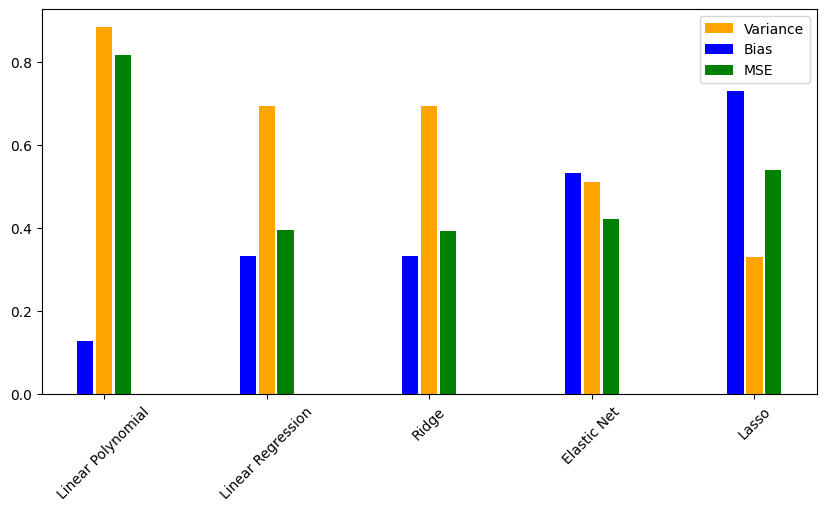

In [ ]:
import matplotlib
import matplotlib.pyplot as plt


# for key in ev:
#   print('{}: {}'.format(key,ev[key]))
#   print('\n')


mdf = pd.DataFrame(ev)
# print(mdf.head(6))
mdf = pd.DataFrame(ev).transpose()
# print(mdf.head(6))

import numpy as np
import matplotlib.pyplot as plt
 
  
# # creating the dataset
# data = {'C':20, 'C++':15, 'Java':30,
#         'Python':35}
# courses = list(data.keys())
# values = list(data.values())
# fig = plt.figure(figsize = (10, 5))
 
# # creating the bar plot
# plt.bar(courses, values, color ='maroon',width = 0.4)
# plt.xlabel("Courses offered")
# plt.ylabel("No. of students enrolled")
# plt.title("Students enrolled in different courses")
# plt.show()






mdf.index.name = 'Type'
mdf.rename(columns={0:'Bias',1:'MSE',2:'RSS',3:'Variance'},inplace=True)#in order to modify instead to create a new copy 
# print(mdf.head(6))


#create a new cope with the features i set it up
#about the feature of inplace

'''
inplacebool, default False
Whether to modify the DataFrame rather than creating a new one. If True then value of copy is ignored.
'''
# tmp=mdf.sort_values(by=['Bias'],inplace=False)
print(tmp.head(6))

mdf.sort_values(by=['Bias'],inplace=True)
# print(mdf.head(6))




labels = mdf.index.values
x = np.arange(len(labels))
width = 0.35  
print(mdf.index.values)
print(x)

print(x-width)


print(mdf.head(8))
# fig, ax = plt.subplots(figsize =(16, 9))
fig,ax=plt.subplots(figsize = (10, 5))
metric = np.arange(len(labels))
width=0.35
# print(type(metric))

plt.bar(metric,mdf['Variance'], color ='orange',width = 0.3/3,label='Variance')
plt.bar(metric-width/3,list(mdf['Bias']), color ='blue',width = 0.3/3,label='Bias')
plt.bar(metric+width/3,list(mdf['MSE']), color ='green',width = 0.3/3,label='MSE')

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()
plt.show()

hi